<a href="https://colab.research.google.com/github/nellyiya/Formative2_Group10/blob/main/formative2_group10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libries

In [6]:
import pandas as pd

In [7]:
import os
from google.colab import files

# Create the main directory for images
input_dir = 'images'
os.makedirs(input_dir, exist_ok=True)

print(f"Created directory: {input_dir}")
print("\nPlease upload your image files into subdirectories within the 'images' folder.")
print("For example, for member 'Branis' and image label 'neutral', create a folder 'images/Branis' and upload 'neutral.jpg' into it.")

# You can use the file upload feature in Colab's left sidebar (folder icon)
# to upload files directly into the created 'images' directory and its subfolders.

# Example structure after uploading:
# images/
# ├── Branis/
# │   ├── neutral.jpg
# │   ├── smiling.jpg
# │   └── surprised.jpg
# ├── Tanguy/
# │   ├── neutral.jpg
# │   ├── smiling.jpg
# │   └── surprised.jpg
# └── ... and so on for all members and labels

Created directory: images

Please upload your image files into subdirectories within the 'images' folder.
For example, for member 'Branis' and image label 'neutral', create a folder 'images/Branis' and upload 'neutral.jpg' into it.


Load social profile

In [8]:
# Load social profiles data
social_df = pd.read_csv('customer_social_profiles.csv')

# Load transactions data
transactions_df = pd.read_csv('customer_transactions.csv')


Exploratory Data Analysis

In [9]:
# Remove leading 'A' from social_df IDs and convert to int
social_df['customer_id_new'] = social_df['customer_id_new'].str.lstrip('A').astype(int)

# Convert transaction IDs to int
transactions_df['customer_id_legacy'] = transactions_df['customer_id_legacy'].astype(int)

# Merge on cleaned IDs
merged_df = pd.merge(
    social_df,
    transactions_df,
    left_on='customer_id_new',
    right_on='customer_id_legacy',
    how='inner'
)

print(f"Merged dataset shape: {merged_df.shape}")
display(merged_df.head())


Merged dataset shape: (219, 11)


customer_id_new social_media_platform  engagement_score  \
0              190               Twitter                82   
1              190               Twitter                82   
2              150              Facebook                96   
3              150              Facebook                96   
4              162               Twitter                89   

   purchase_interest_score review_sentiment  customer_id_legacy  \
0                      4.8          Neutral                 190   
1                      4.8          Neutral                 190   
2                      1.6         Positive                 150   
3                      1.6         Positive                 150   
4                      2.6         Positive                 162   

   transaction_id  purchase_amount purchase_date product_category  \
0            1031              333    2024-01-31        Groceries   
1            1140              401    2024-05-19           Sports   
2            1042              389    2024-02-11           Sports   
3            1046              177    2024-02-15            Books   
4            1079              101    2024-03-19            Books   

   customer_rating  
0              3.8  
1              4.9  
2              NaN  
3              3.6  
4              4.2

In [10]:
print("Social Profiles Data Sample:")
display(social_df.head())

print("\nTransactions Data Sample:")
display(transactions_df.head())

Social Profiles Data Sample:


customer_id_new social_media_platform  engagement_score  \
0              178              LinkedIn                74   
1              190               Twitter                82   
2              150              Facebook                96   
3              162               Twitter                89   
4              197               Twitter                92   

   purchase_interest_score review_sentiment  
0                      4.9         Positive  
1                      4.8          Neutral  
2                      1.6         Positive  
3                      2.6         Positive  
4                      2.3          Neutral


Transactions Data Sample:


customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 151            1001              408    2024-01-01   
1                 192            1002              332    2024-01-02   
2                 114            1003              442    2024-01-03   
3                 171            1004              256    2024-01-04   
4                 160            1005               64    2024-01-05   

  product_category  customer_rating  
0           Sports              2.3  
1      Electronics              4.2  
2      Electronics              2.1  
3         Clothing              2.8  
4         Clothing              1.3

In [11]:
print("Social Profiles Columns:")
print(social_df.columns)

print("\nTransactions Columns:")
print(transactions_df.columns)

Social Profiles Columns:
Index(['customer_id_new', 'social_media_platform', 'engagement_score',
       'purchase_interest_score', 'review_sentiment'],
      dtype='object')

Transactions Columns:
Index(['customer_id_legacy', 'transaction_id', 'purchase_amount',
       'purchase_date', 'product_category', 'customer_rating'],
      dtype='object')


In [12]:
# Convert both ID columns to string type
social_df['customer_id_new'] = social_df['customer_id_new'].astype(str)
transactions_df['customer_id_legacy'] = transactions_df['customer_id_legacy'].astype(str)

# Now merge
merged_df = pd.merge(
    social_df,
    transactions_df,
    left_on='customer_id_new',
    right_on='customer_id_legacy',
    how='inner'
)

print(f"Merged dataset shape: {merged_df.shape}")
display(merged_df.head())

Merged dataset shape: (219, 11)


customer_id_new social_media_platform  engagement_score  \
0             190               Twitter                82   
1             190               Twitter                82   
2             150              Facebook                96   
3             150              Facebook                96   
4             162               Twitter                89   

   purchase_interest_score review_sentiment customer_id_legacy  \
0                      4.8          Neutral                190   
1                      4.8          Neutral                190   
2                      1.6         Positive                150   
3                      1.6         Positive                150   
4                      2.6         Positive                162   

   transaction_id  purchase_amount purchase_date product_category  \
0            1031              333    2024-01-31        Groceries   
1            1140              401    2024-05-19           Sports   
2            1042              389    2024-02-11           Sports   
3            1046              177    2024-02-15            Books   
4            1079              101    2024-03-19            Books   

   customer_rating  
0              3.8  
1              4.9  
2              NaN  
3              3.6  
4              4.2

In [13]:
print("Missing values per column:")
print(merged_df.isnull().sum())

# Example: Fill missing values forward
merged_df.fillna(method='ffill', inplace=True)

# Or drop missing rows (choose one based on your dataset)
merged_df.drop(columns=['customer_id_legacy'], inplace=True)


Missing values per column:
customer_id_new             0
social_media_platform       0
engagement_score            0
purchase_interest_score     0
review_sentiment            0
customer_id_legacy          0
transaction_id              0
purchase_amount             0
purchase_date               0
product_category            0
customer_rating            19
dtype: int64


/tmp/ipython-input-13-2774858120.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


In [15]:
# Example: Drop irrelevant columns if any
columns_to_drop = ['column_to_drop1', 'column_to_drop2']  # replace with real columns if needed
merged_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [16]:
merged_df.to_csv('merged_customer_data.csv', index=False)
print("Merged dataset saved as 'merged_customer_data.csv'")

Merged dataset saved as 'merged_customer_data.csv'


In [17]:
# Save the cleaned dataset
merged_df.to_csv('merged_customer_data_cleaned.csv', index=False)

print("Cleaned merged data saved as 'merged_customer_data_cleaned.csv'")

Cleaned merged data saved as 'merged_customer_data_cleaned.csv'


In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from PIL import Image, ImageOps # Add ImageOps here

In [19]:
group_members = ['Branis', 'Tanguy', 'Nelly', 'Nhial']
image_labels = ['neutral', 'smiling', 'surprised']
input_dir = '/content/images'
augmented_dir = 'augmented_images'
os.makedirs(augmented_dir, exist_ok=True)

Preprocessing images

Showing images for: Branis


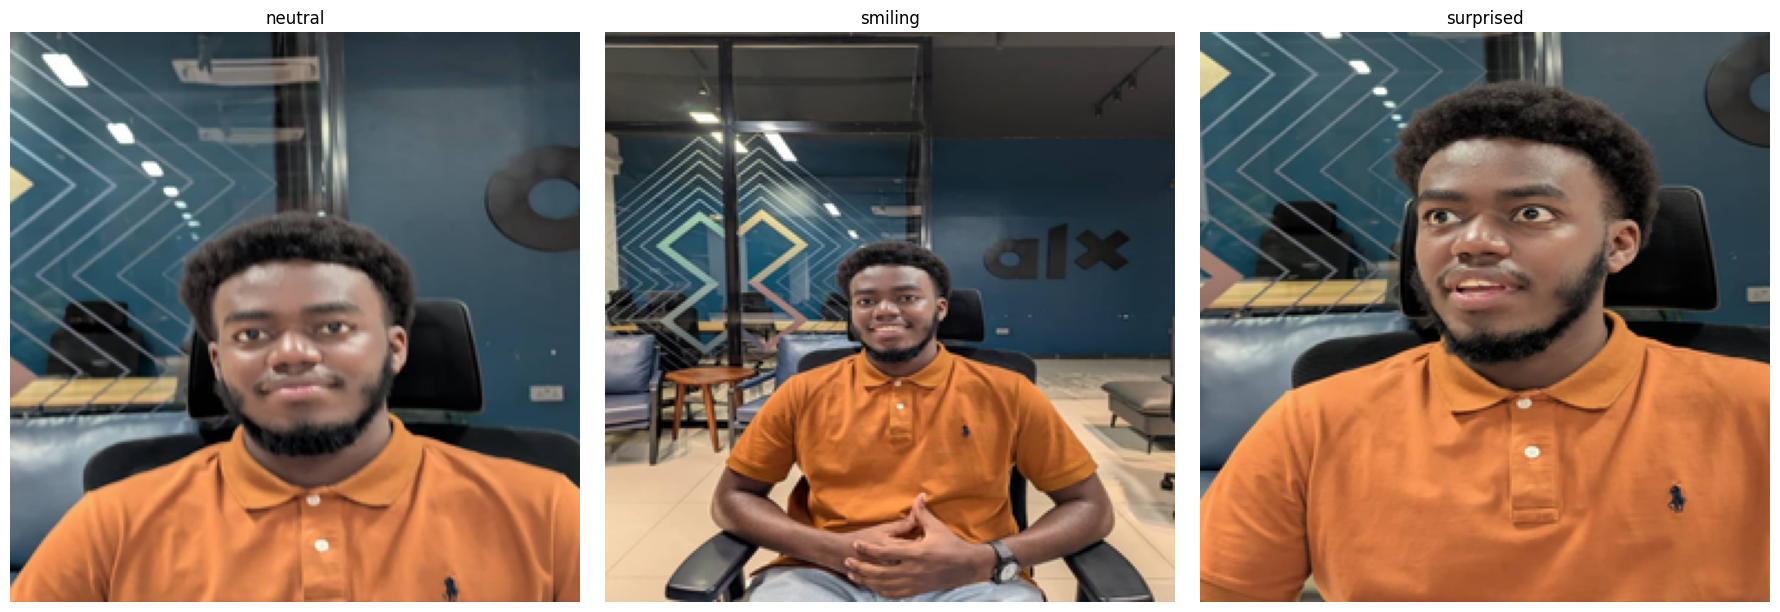

Showing images for: Tanguy


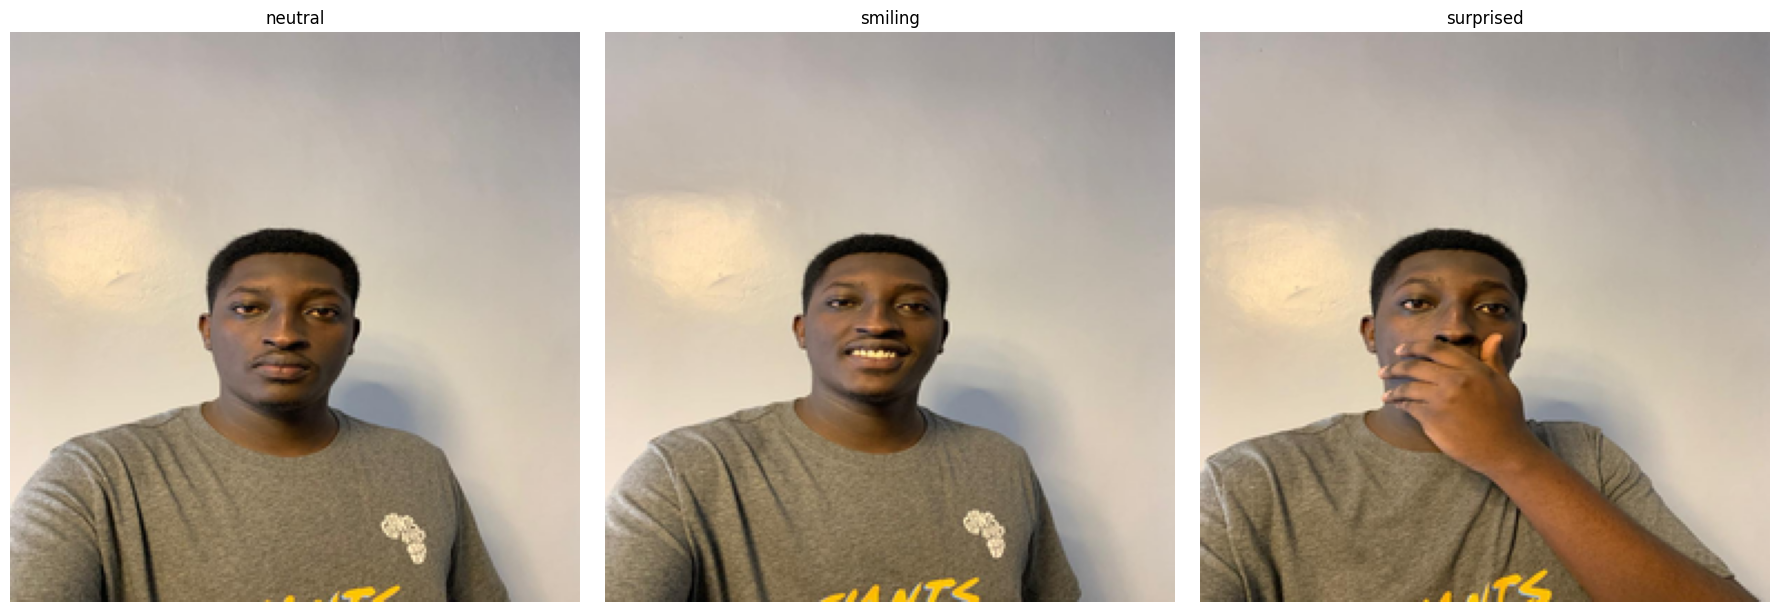

Showing images for: Nelly


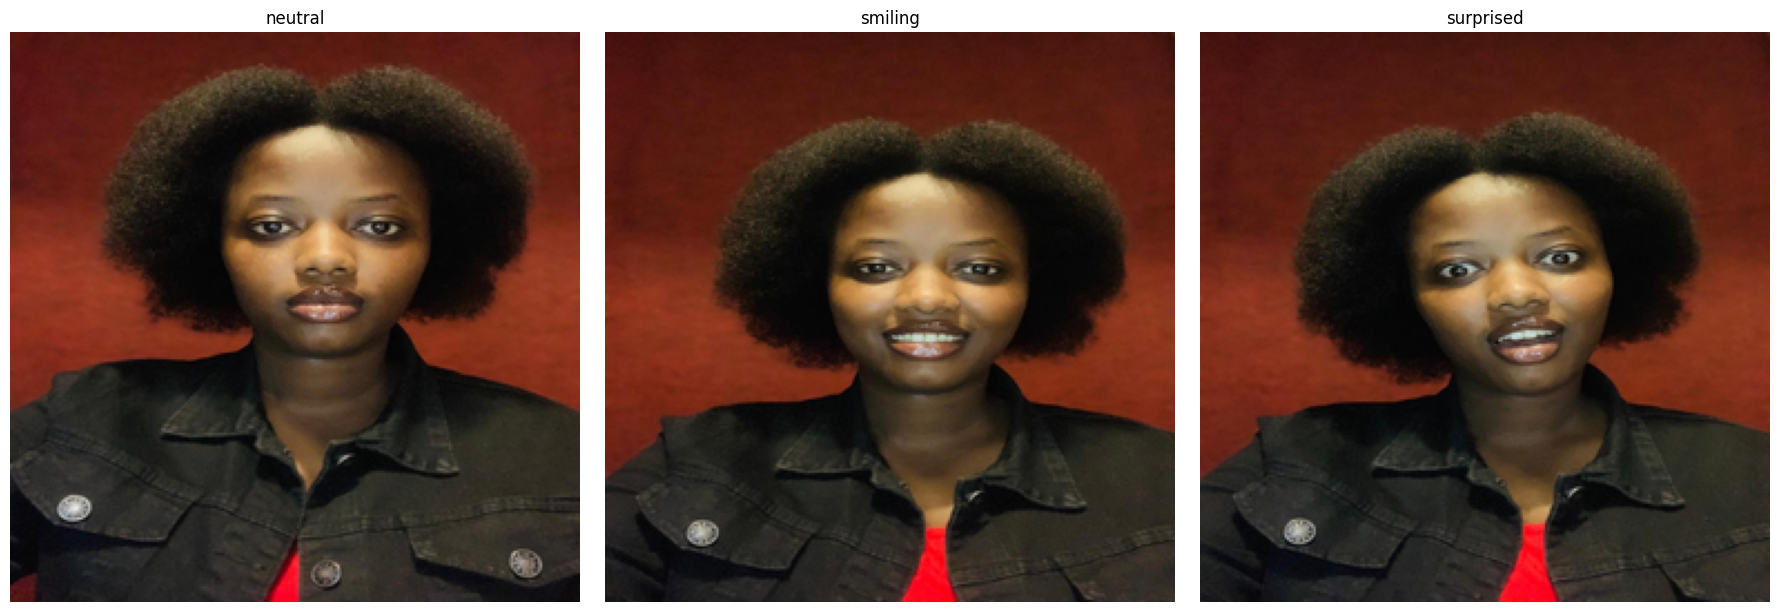

Showing images for: Nhial


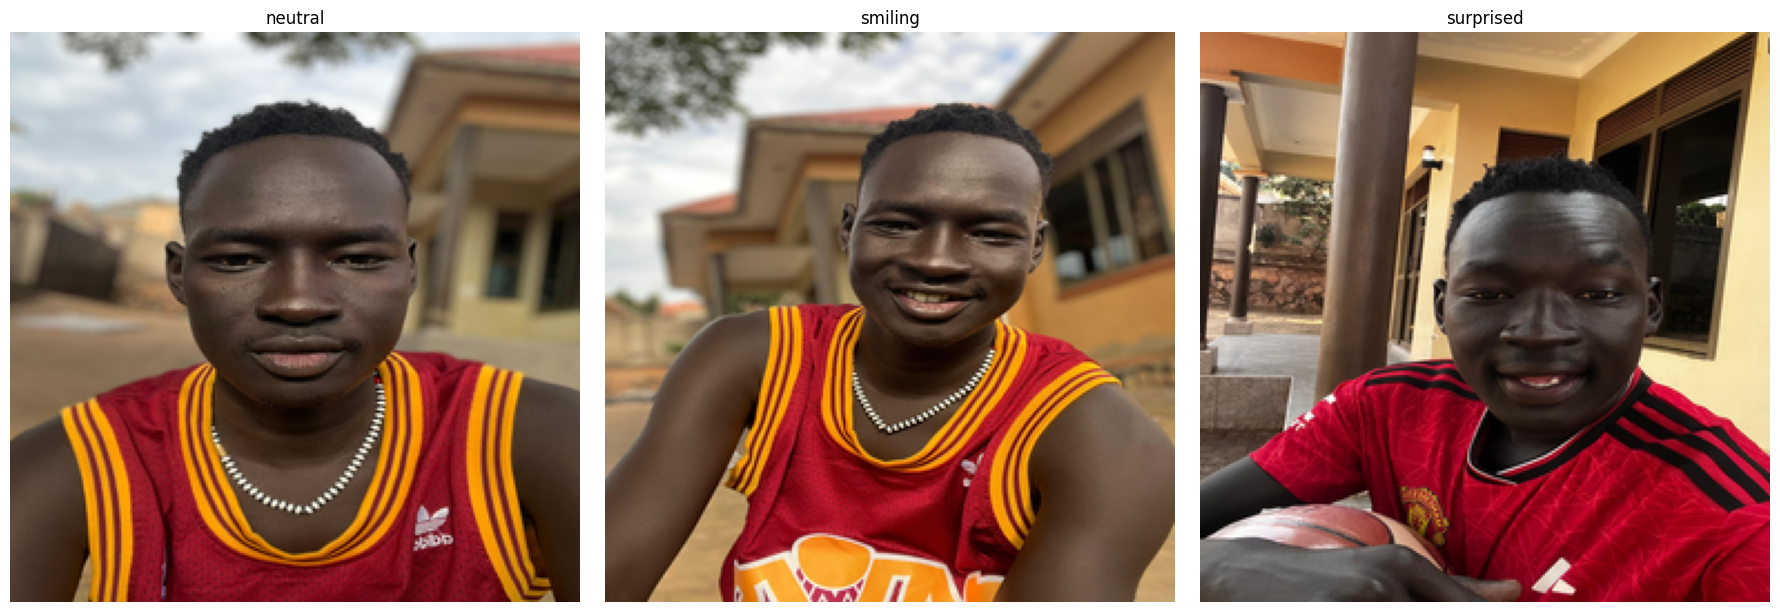

In [20]:
from PIL import Image

all_images = {}

for member in group_members:
    member_dir = os.path.join(input_dir, member)
    member_images = {}

    for label in image_labels:
        img_path = os.path.join(member_dir, f'{label}.jpg')
        if os.path.exists(img_path):
            img = Image.open(img_path)
            # Use LANCZOS filter for sharp resizing
            img = img.resize((256, 256), Image.LANCZOS)
            member_images[label] = img

    all_images[member] = member_images

for member in all_images:
    print(f"Showing images for: {member}")
    fig, axs = plt.subplots(1, len(image_labels), figsize=(18, 6))
    for i, label in enumerate(image_labels):
        img = all_images[member].get(label, Image.new('RGB', (256, 256)))
        axs[i].imshow(img)
        axs[i].set_title(label)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()


In [21]:
for member in os.listdir(input_dir):
    member_path = os.path.join(input_dir, member)
    if not os.path.isdir(member_path):
        continue

    jpgs = [f for f in os.listdir(member_path) if f.lower().endswith('.jpg')]
    print(f"{member} has {len(jpgs)} JPG Image")

Branis has 3 JPG Image
Nhial has 3 JPG Image
Tanguy has 3 JPG Image
Nelly has 3 JPG Image
.ipynb_checkpoints has 0 JPG Image


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image Augmentation

In [23]:
def augment_image(image):
    return {
        'rotated': image.rotate(30),
        'flipped': ImageOps.mirror(image),
        'grayscale': ImageOps.grayscale(image).convert('RGB')
    }

augmented_images = {}

for member, imgs in all_images.items():
    member_augmented = {}
    for label, img in imgs.items():
        augmented_versions = augment_image(img)
        for aug_type, aug_img in augmented_versions.items():
            member_augmented[f'{label}_{aug_type}'] = aug_img
    augmented_images[member] = member_augmented


In [24]:
import numpy as np

output_dir = 'augmented_images'
os.makedirs(output_dir, exist_ok=True)

for member, imgs in augmented_images.items():
    member_dir = os.path.join(output_dir, member)
    os.makedirs(member_dir, exist_ok=True)
    print(f"Saving images for member: {member} into folder: {member_dir}")

    for name, img in imgs.items():
        save_path = os.path.join(member_dir, f"{name}.jpg")
        print(f"  Attempting to save image: {name}, type: {type(img)}")

        # Convert PIL Image to OpenCV format if needed
        if isinstance(img, Image.Image):
            img = np.array(img)                 # PIL to numpy array (RGB)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR for OpenCV

        # Now save with OpenCV
        success = cv2.imwrite(save_path, img)
        if success:
            print(f"  Saved {save_path}")
        else:
            print(f"  ERROR: Failed to save {save_path}")

Saving images for member: Branis into folder: augmented_images/Branis
  Attempting to save image: neutral_rotated, type: <class 'PIL.Image.Image'>
  Saved augmented_images/Branis/neutral_rotated.jpg
  Attempting to save image: neutral_flipped, type: <class 'PIL.Image.Image'>
  Saved augmented_images/Branis/neutral_flipped.jpg
  Attempting to save image: neutral_grayscale, type: <class 'PIL.Image.Image'>
  Saved augmented_images/Branis/neutral_grayscale.jpg
  Attempting to save image: smiling_rotated, type: <class 'PIL.Image.Image'>
  Saved augmented_images/Branis/smiling_rotated.jpg
  Attempting to save image: smiling_flipped, type: <class 'PIL.Image.Image'>
  Saved augmented_images/Branis/smiling_flipped.jpg
  Attempting to save image: smiling_grayscale, type: <class 'PIL.Image.Image'>
  Saved augmented_images/Branis/smiling_grayscale.jpg
  Attempting to save image: surprised_rotated, type: <class 'PIL.Image.Image'>
  Saved augmented_images/Branis/surprised_rotated.jpg
  Attempting to

In [25]:
def extract_color_histogram(image_path, bins=96):
    try:
        image = Image.open(image_path).convert("RGB")
        histogram = image.histogram()
        histogram = np.array(histogram).astype('float32')
        histogram /= histogram.sum()  # Normalize
        return histogram
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

In [2]:
def extract_histogram(image):
    image_np = np.array(image)
    hist_r, _ = np.histogram(image_np[:, :, 0], bins=16, range=(0, 256))
    hist_g, _ = np.histogram(image_np[:, :, 1], bins=16, range=(0, 256))
    hist_b, _ = np.histogram(image_np[:, :, 2], bins=16, range=(0, 256))
    return np.concatenate([hist_r, hist_g, hist_b])

In [26]:
feature_rows = []

for member in group_members:
    # Original images
    for label, img in all_images.get(member, {}).items():
        hist = extract_histogram(img)
        feature_rows.append({
            'member': member,
            'image_type': label,
            **{f'bin_{i}': val for i, val in enumerate(hist)}
        })

    # Augmented images
    for label_aug, img in augmented_images.get(member, {}).items():
        hist = extract_histogram(img)
        feature_rows.append({
            'member': member,
            'image_type': label_aug,
            **{f'bin_{i}': val for i, val in enumerate(hist)}
        })

features_df = pd.DataFrame(feature_rows)
features_df.to_csv('image_features.csv', index=False)
print(f"Extracted features for {features_df.shape[0]} images and saved to 'image_features.csv'")
features_df.head()


Extracted features for 48 images and saved to 'image_features.csv'


member       image_type  bin_0  bin_1  bin_2  bin_3  bin_4  bin_5  bin_6  \
0  Branis          neutral   2462   3339   7379  11832   7560   5986   2669   
1  Branis          smiling   1032   8727  10143   8120   5434   3472   2833   
2  Branis        surprised   3177   3580   5990   7811   5022   2172   2263   
3  Branis  neutral_rotated  12601   3150   6126   9731   6657   5461   2288   
4  Branis  neutral_flipped   2462   3339   7379  11832   7560   5986   2669   

   bin_7  ...  bin_38  bin_39  bin_40  bin_41  bin_42  bin_43  bin_44  bin_45  \
0   2026  ...   12841    6131    2680    1312     887     657     301     135   
1   2871  ...    4175    3622    2588    2808    4257     792     445      90   
2   1975  ...    6896    2629    1789    1041     616     425     165      55   
3   1827  ...   11750    5286    2268    1162     720     596     249     118   
4   2026  ...   12841    6131    2680    1312     887     657     301     135   

   bin_46  bin_47  
0      29     260  
1      31     130  
2      20      57  
3      24     113  
4      29     260  

[5 rows x 50 columns]

load and plot waveform and spectrogram

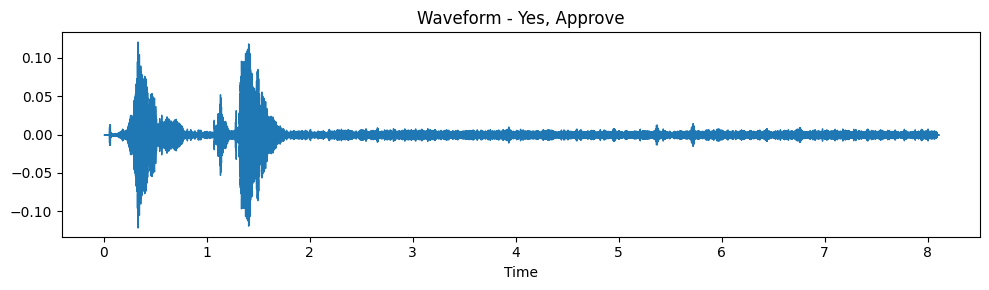

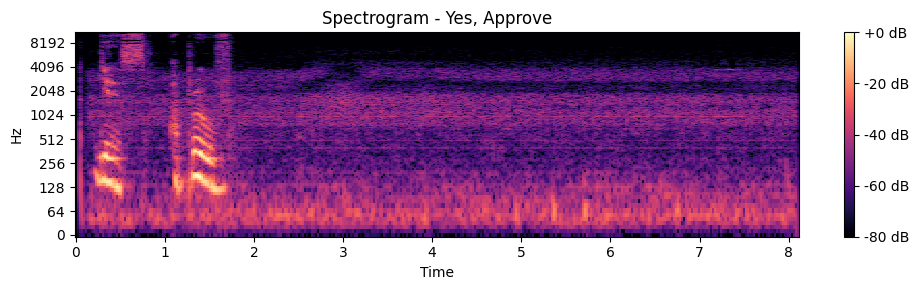

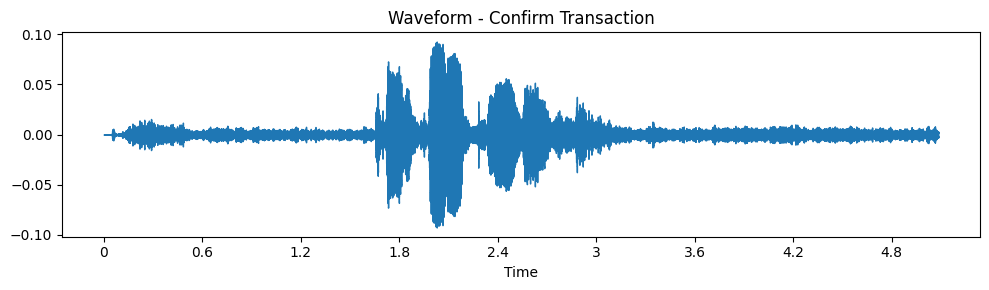

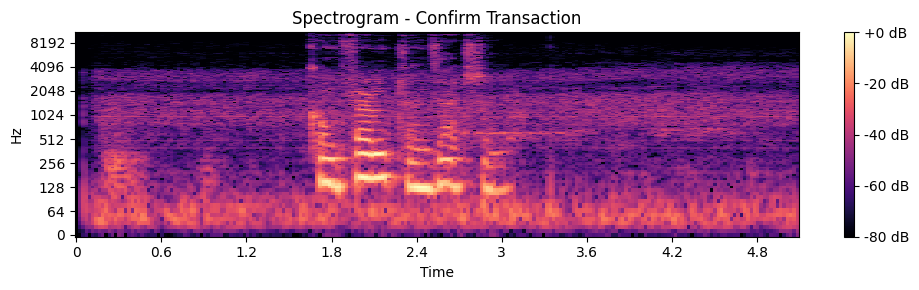

In [26]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to load and plot waveform and spectrogram
def visualize_audio(file_path, title):
    y, sr = librosa.load(file_path)

    # Waveform
    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform - {title}")
    plt.tight_layout()
    plt.show()

    # Spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(10, 3))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f"Spectrogram - {title}")
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

    return y, sr

# Example usage
y1, sr1 = visualize_audio('KG_25_Avenue.wav', 'Yes, Approve')
y2, sr2 = visualize_audio('KG_25_Avenue_3.wav', 'Confirm Transaction')


Applying Augmentations

In [27]:
import soundfile as sf

def apply_augmentations(y, sr, base_name):
    aug_files = []

    # 1. Time Stretch
    y_stretch = librosa.effects.time_stretch(y, rate=1.25)
    file1 = f"{base_name}_stretch.wav"
    sf.write(file1, y_stretch, sr)
    aug_files.append(file1)

    # 2. Pitch Shift
    y_pitch = librosa.effects.pitch_shift(y, sr=sr, n_steps=4)
    file2 = f"{base_name}_pitch.wav"
    sf.write(file2, y_pitch, sr)
    aug_files.append(file2)

    # 3. Add Background Noise
    noise = 0.003 * np.random.randn(len(y))
    y_noise = y + noise
    file3 = f"{base_name}_noise.wav"
    sf.write(file3, y_noise, sr)
    aug_files.append(file3)

    return aug_files

# Augment both original recordings
augmented_yes = apply_augmentations(y1, sr1, 'yes_approve')
augmented_confirm = apply_augmentations(y2, sr2, 'confirm_transaction')


Features' extraction

In [29]:
import pandas as pd

def extract_features(file):
    y, sr = librosa.load(file)

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs)

    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_mean = np.mean(rolloff)

    energy = np.sum(y ** 2) / len(y)

    return {
        "filename": file,
        "mfcc_mean": mfccs_mean,
        "rolloff_mean": rolloff_mean,
        "energy": energy
    }

# List all files to extract features
all_files = ["KG_25_Avenue.wav", "KG_25_Avenue_3.wav"] + augmented_yes + augmented_confirm

# Extract features
features = [extract_features(f) for f in all_files]
df = pd.DataFrame(features)

# Save to CSV
df.to_csv("audio_features.csv", index=False)
print("✅ Features saved to audio_features.csv")

✅ Features saved to audio_features.csv


In [30]:
import os

print("Contents of /content:")
print(os.listdir('/content'))

print("\nContents of /content/images:")
try:
    print(os.listdir('/content/images'))
except FileNotFoundError:
    print("/content/images not found.")

Contents of /content:
['.config', 'confirm_transaction_noise.wav', 'augmented_images', 'yes_approve_pitch.wav', 'merged_customer_data.csv', 'yes_approve_stretch.wav', 'image_features.csv', 'confirm_transaction_stretch.wav', 'KG_25_Avenue_3.wav', 'KG_25_Avenue.wav', 'customer_social_profiles.csv', 'confirm_transaction_pitch.wav', 'images', 'audio_features.csv', 'drive', 'merged_customer_data_cleaned.csv', 'customer_transactions.csv', 'yes_approve_noise.wav', 'sample_data']

Contents of /content/images:
['Branis', 'Nhial', 'Tanguy', 'Nelly', '.ipynb_checkpoints']


1. Facial Recognition Model

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss, make_scorer
import numpy as np # For handling potential missing values or inf
import xgboost as xgb # Import XGBoost for consistency if you want to tune it later

print("--- Facial Recognition Model with Hyperparameter Tuning ---")

try:
    image_features_df = pd.read_csv('image_features.csv')
    # Clean data: handle NaNs/Infs which can occur from feature extraction
    image_features_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    image_features_df.dropna(inplace=True) # Drop rows with any NaNs
except FileNotFoundError:
    print("Error: 'image_features.csv' not found. Please ensure Task 2 is completed and the file exists.")
    exit()
except Exception as e:
    print(f"Error loading or processing 'image_features.csv': {e}")
    exit()

# Features (X) will be all 'bin_X' columns, target (y) is 'member'
feature_columns_face = [col for col in image_features_df.columns if col.startswith('bin_')]

if not feature_columns_face:
    print("Error: No 'bin_' prefixed columns found in image_features.csv. "
          "Please ensure your feature extraction in Task 2 generates these columns.")
    exit()

X_face = image_features_df[feature_columns_face]
y_face = image_features_df['member']

if X_face.empty or y_face.empty:
    print("Error: Features or target data is empty for Facial Recognition. Check your image_features.csv.")
    exit()

# It's crucial that there are at least 2 unique members and enough samples per member for stratify and cross-validation
if y_face.nunique() < 2:
    print("Error: Less than 2 unique 'member' labels found. Cannot perform classification.")
    exit()
if y_face.value_counts().min() < 2: # At least 2 samples per class for 2-fold CV, more for higher k
    print("Warning: Some member classes have very few samples. Stratified split or cross-validation might fail or be unstable.")


# Split data (using stratify to maintain class distribution)
X_train_face, X_test_face, y_train_face, y_test_face = train_test_split(
    X_face, y_face, test_size=0.3, random_state=42, stratify=y_face
)

print(f"Facial Recognition Data Split: Training samples = {len(X_train_face)}, Test samples = {len(X_test_face)}")

# --- Model 1: Random Forest Classifier with Hyperparameter Tuning ---
print("\nTraining Random Forest Classifier with Hyperparameter Tuning for Facial Recognition...")

# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 200], # Number of trees in the forest
    'max_features': ['sqrt', 'log2'], # Number of features to consider when looking for the best split
    'max_depth': [None, 10, 20], # Maximum depth of the tree
    'min_samples_leaf': [1, 2], # Minimum number of samples required to be at a leaf node
}

# Create a scorer for F1-weighted as it's often more informative for multi-class/imbalanced data
scorer_f1_weighted = make_scorer(f1_score, average='weighted', zero_division=0)

# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=min(5, X_train_face.shape[0] // y_train_face.nunique()), # Adjust CV folds based on data size
                              scoring=scorer_f1_weighted,
                              n_jobs=-1,
                              verbose=1)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train_face, y_train_face)

# Get the best estimator found by GridSearchCV
best_rf_face_model = grid_search_rf.best_estimator_

print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
print(f"Best Random Forest Cross-validation F1-Score: {grid_search_rf.best_score_:.4f}")

# Evaluate the best model on the test set
y_pred_rf_face = best_rf_face_model.predict(X_test_face)
y_proba_rf_face = best_rf_face_model.predict_proba(X_test_face)

accuracy_rf_face = accuracy_score(y_test_face, y_pred_rf_face)
f1_rf_face = f1_score(y_test_face, y_pred_rf_face, average='weighted', zero_division=0)
loss_rf_face = log_loss(y_test_face, y_proba_rf_face)

print(f"Optimized Random Forest - Test Accuracy: {accuracy_rf_face:.4f}")
print(f"Optimized Random Forest - Test F1-Score: {f1_rf_face:.4f}")
print(f"Optimized Random Forest - Test Loss: {loss_rf_face:.4f}")

# --- Model 2: Logistic Regression (Optional: Add Tuning Here too) ---
print("\nTraining Logistic Regression for Facial Recognition (without tuning in this example)...")
lr_face_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
lr_face_model.fit(X_train_face, y_train_face)

y_pred_lr_face = lr_face_model.predict(X_test_face)
y_proba_lr_face = lr_face_model.predict_proba(X_test_face)

accuracy_lr_face = accuracy_score(y_test_face, y_pred_lr_face)
f1_lr_face = f1_score(y_test_face, y_pred_lr_face, average='weighted', zero_division=0)
loss_lr_face = log_loss(y_test_face, y_proba_lr_face)

print(f"Logistic Regression - Accuracy: {accuracy_lr_face:.4f}")
print(f"Logistic Regression - F1-Score: {f1_lr_face:.4f}")
print(f"Logistic Regression - Loss: {loss_lr_face:.4f}")

# --- Model 3: XGBoost Classifier (Optional: Add Tuning Here too) ---
print("\nTraining XGBoost Classifier for Facial Recognition (without tuning in this example)...")
# Convert labels to numerical for XGBoost
label_mapping_face = {label: i for i, label in enumerate(y_train_face.unique())}
y_train_face_encoded = y_train_face.map(label_mapping_face)
y_test_face_encoded = y_test_face.map(label_mapping_face)

xgb_face_model = xgb.XGBClassifier(n_estimators=100, eval_metric='mlogloss', random_state=42) # Removed use_label_encoder
xgb_face_model.fit(X_train_face, y_train_face_encoded)

y_pred_xgb_face_encoded = xgb_face_model.predict(X_test_face)
y_proba_xgb_face = xgb_face_model.predict_proba(X_test_face)

accuracy_xgb_face = accuracy_score(y_test_face_encoded, y_pred_xgb_face_encoded)
f1_xgb_face = f1_score(y_test_face_encoded, y_pred_xgb_face_encoded, average='weighted', zero_division=0)
loss_xgb_face = log_loss(y_test_face_encoded, y_proba_xgb_face)

print(f"XGBoost - Accuracy: {accuracy_xgb_face:.4f}")
print(f"XGBoost - F1-Score: {f1_xgb_face:.4f}")
print(f"XGBoost - Loss: {loss_xgb_face:.4f}")

--- Facial Recognition Model with Hyperparameter Tuning ---
Facial Recognition Data Split: Training samples = 33, Test samples = 15

Training Random Forest Classifier with Hyperparameter Tuning for Facial Recognition...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Random Forest Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 50}
Best Random Forest Cross-validation F1-Score: nan
Optimized Random Forest - Test Accuracy: 0.8667
Optimized Random Forest - Test F1-Score: 0.8578
Optimized Random Forest - Test Loss: 0.2693

Training Logistic Regression for Facial Recognition (without tuning in this example)...
Logistic Regression - Accuracy: 0.8000
Logistic Regression - F1-Score: 0.7673
Logistic Regression - Loss: 1.7774

Training XGBoost Classifier for Facial Recognition (without tuning in this example)...
XGBoost - Accuracy: 0.7333
XGBoost - F1-Score: 0.6978
XGBoost - Loss: 0.6344


Voiceprint Verification Model

In [32]:
import pandas as pd

audio_features_df_check = pd.read_csv('/content/audio_features.csv')

print("First 5 rows of audio_features.csv:")
display(audio_features_df_check.head())

print("\nColumns in audio_features.csv:")
print(audio_features_df_check.columns)

First 5 rows of audio_features.csv:


filename  mfcc_mean  rolloff_mean    energy
0         KG_25_Avenue.wav -23.892967   3483.333984  0.000100
1       KG_25_Avenue_3.wav -21.878180   3329.277899  0.000135
2  yes_approve_stretch.wav -27.027021   3524.908447  0.000040
3    yes_approve_pitch.wav -25.833534   4256.283691  0.000044
4    yes_approve_noise.wav -20.446852   8944.123535  0.000109


Columns in audio_features.csv:
Index(['filename', 'mfcc_mean', 'rolloff_mean', 'energy'], dtype='object')


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, log_loss, make_scorer
import numpy as np
import os # Needed for os.path.basename

print("\n--- Improved Voiceprint Verification Model ---")

try:
    audio_features_df = pd.read_csv('audio_features.csv')
    # Clean data: handle NaNs/Infs which can occur from feature extraction
    audio_features_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    audio_features_df.dropna(inplace=True) # Drop rows with any remaining NaNs
except FileNotFoundError:
    print("Error: 'audio_features.csv' not found. Please ensure Task 3 is completed and the file exists.")
    exit()
except Exception as e:
    print(f"Error loading or processing 'audio_features.csv': {e}")
    exit()

# --- STEP 1: Derive 'speaker' column from 'filename' ---
def extract_speaker_from_filename(filename):
    base_name = os.path.basename(filename)
    speaker_name = base_name.split('_')[0]
    return speaker_name

if 'filename' in audio_features_df.columns:
    audio_features_df['speaker'] = audio_features_df['filename'].apply(extract_speaker_from_filename)
    print("Derived 'speaker' column from filenames.")
else:
    print("Error: 'filename' column not found in audio_features.csv. Cannot derive speaker information.")
    exit()

if 'speaker' not in audio_features_df.columns or audio_features_df['speaker'].nunique() < 2:
    print("Error: Could not effectively derive unique speaker names from filenames, or only one speaker found after derivation.")
    print("Please check your filename conventions and the `extract_speaker_from_filename` function.")
    exit()

# --- Feature and Target Column Selection (IMPROVED FEATURE SET) ---
# Now including all MFCC features if they exist
feature_columns_voice = [
    'mfcc_mean', 'rolloff_mean', 'energy'
]
# Dynamically add all mfcc_mean_X columns
for i in range(13): # Assuming mfcc_mean_0 to mfcc_mean_12
    mfcc_col = f'mfcc_mean_{i}'
    if mfcc_col in audio_features_df.columns:
        feature_columns_voice.append(mfcc_col)

# Ensure unique features
feature_columns_voice = list(set(feature_columns_voice))
# Sort to ensure consistent order (optional, but good practice)
feature_columns_voice.sort()


# Verify all selected feature columns exist
missing_features = [col for col in feature_columns_voice if col not in audio_features_df.columns]
if missing_features:
    print(f"Warning: The following specified numerical feature columns are missing from 'audio_features.csv': {missing_features}. "
          "They will be excluded from the feature set.")
    # Remove missing features from the list
    feature_columns_voice = [col for col in feature_columns_voice if col not in missing_features]


X_voice = audio_features_df[feature_columns_voice]
y_voice = audio_features_df['speaker']

if X_voice.empty or y_voice.empty:
    print("Error: Features or target data is empty for Voiceprint Verification after selection. Check your audio_features.csv content.")
    exit()

# Check for sufficient samples per class for stratified split and CV
if y_voice.nunique() < 2:
    print("Error: Less than 2 unique 'speaker' labels found. Cannot perform classification.")
    exit()
if y_voice.value_counts().min() < 2: # At least 2 samples per class for 2-fold CV, more for higher k
    print("Warning: Some speaker classes have very few samples. Stratified split or cross-validation might fail or be unstable.")


# Split data
X_train_voice, X_test_voice, y_train_voice, y_test_voice = train_test_split(
    X_voice, y_voice, test_size=0.3, random_state=42, stratify=y_voice
)

print(f"Voiceprint Verification Data Split: Training samples = {len(X_train_voice)}, Test samples = {len(X_test_voice)}")

# --- Model 1: Random Forest Classifier with Hyperparameter Tuning ---
print("\nTraining Random Forest Classifier with Hyperparameter Tuning for Voiceprint Verification...")

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10], # Limiting max_depth given small dataset
    'min_samples_leaf': [1, 2],
}

scorer_f1_weighted = make_scorer(f1_score, average='weighted', zero_division=0)

# cv parameter adjustment: min(5, number of samples per class in smallest class)
# This prevents GridSearchCV from failing if a fold has no samples for a class.
min_samples_in_class = y_train_voice.value_counts().min()
n_splits_cv = min(5, min_samples_in_class) if min_samples_in_class >=2 else 2 # Ensure at least 2 splits if data allows

grid_search_rf_voice = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                    param_grid=param_grid_rf,
                                    cv=n_splits_cv,
                                    scoring=scorer_f1_weighted,
                                    n_jobs=-1,
                                    verbose=1)

grid_search_rf_voice.fit(X_train_voice, y_train_voice)

best_rf_voice_model = grid_search_rf_voice.best_estimator_

print(f"Best Random Forest Parameters: {grid_search_rf_voice.best_params_}")
print(f"Best Random Forest Cross-validation F1-Score: {grid_search_rf_voice.best_score_:.4f}")

y_pred_rf_voice = best_rf_voice_model.predict(X_test_voice)
y_proba_rf_voice = best_rf_voice_model.predict_proba(X_test_voice)

accuracy_rf_voice = accuracy_score(y_test_voice, y_pred_rf_voice)
f1_rf_voice = f1_score(y_test_voice, y_pred_rf_voice, average='weighted', zero_division=0)
loss_rf_voice = log_loss(y_test_voice, y_proba_rf_voice)

print(f"Optimized Random Forest - Test Accuracy: {accuracy_rf_voice:.4f}")
print(f"Optimized Random Forest - Test F1-Score: {f1_rf_voice:.4f}")
print(f"Optimized Random Forest - Test Loss: {loss_rf_voice:.4f}")

# --- Model 2: Logistic Regression (without tuning in this example) ---
print("\nTraining Logistic Regression for Voiceprint Verification...")
lr_voice_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
lr_voice_model.fit(X_train_voice, y_train_voice)

y_pred_lr_voice = lr_voice_model.predict(X_test_voice)
y_proba_lr_voice = lr_voice_model.predict_proba(X_test_voice)

accuracy_lr_voice = accuracy_score(y_test_voice, y_pred_lr_voice)
f1_lr_voice = f1_score(y_test_voice, y_pred_lr_voice, average='weighted', zero_division=0)
loss_lr_voice = log_loss(y_test_voice, y_proba_lr_voice)

print(f"Logistic Regression - Accuracy: {accuracy_lr_voice:.4f}")
print(f"Logistic Regression - F1-Score: {f1_lr_voice:.4f}")
print(f"Logistic Regression - Loss: {loss_lr_voice:.4f}")

# --- Model 3: XGBoost Classifier (without tuning in this example) ---
print("\nTraining XGBoost Classifier for Voiceprint Verification...")

label_mapping_voice = {label: i for i, label in enumerate(y_train_voice.unique())}
y_train_voice_encoded = y_train_voice.map(label_mapping_voice)
y_test_voice_encoded = y_test_voice.map(label_mapping_voice)

num_classes_voice = y_train_voice_encoded.nunique()

xgb_voice_model = xgb.XGBClassifier(
    n_estimators=100,
    # REMOVED: use_label_encoder=False (as it's deprecated and not needed)
    eval_metric='mlogloss',
    objective='multi:softprob',
    num_class=num_classes_voice,
    random_state=42
)
xgb_voice_model.fit(X_train_voice, y_train_voice_encoded)

y_pred_xgb_voice_encoded = xgb_voice_model.predict(X_test_voice)
y_proba_xgb_voice = xgb_voice_model.predict_proba(X_test_voice)

accuracy_xgb_voice = accuracy_score(y_test_voice_encoded, y_pred_xgb_voice_encoded)
f1_xgb_voice = f1_score(y_test_voice_encoded, y_pred_xgb_voice_encoded, average='weighted', zero_division=0)
loss_xgb_voice = log_loss(y_test_voice_encoded, y_proba_xgb_voice)

print(f"XGBoost - Accuracy: {accuracy_xgb_voice:.4f}")
print(f"XGBoost - F1-Score: {f1_xgb_voice:.4f}")
print(f"XGBoost - Loss: {loss_xgb_voice:.4f}")


--- Improved Voiceprint Verification Model ---
Derived 'speaker' column from filenames.
Voiceprint Verification Data Split: Training samples = 5, Test samples = 3

Training Random Forest Classifier with Hyperparameter Tuning for Voiceprint Verification...
Fitting 2 folds for each of 36 candidates, totalling 72 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best Random Forest Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 50}
Best Random Forest Cross-validation F1-Score: nan
Optimized Random Forest - Test Accuracy: 0.3333
Optimized Random Forest - Test F1-Score: 0.2222
Optimized Random Forest - Test Loss: 1.6141

Training Logistic Regression for Voiceprint Verification...
Logistic Regression - Accuracy: 0.0000
Logistic Regression - F1-Score: 0.0000
Logistic Regression - Loss: 4.4902

Training XGBoost Classifier for Voiceprint Verification...
XGBoost - Accuracy: 0.3333
XGBoost - F1-Score: 0.1667
XGBoost - Loss: 1.1473


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Product Recommendation Model:

In [1]:
import pandas as pd
import os

print("\n--- Product Recommendation Model ---")

try:
    # Load social profiles data
    social_df = pd.read_csv('customer_social_profiles.csv')
    # Load transactions data
    transactions_df = pd.read_csv('customer_transactions.csv')
    print("Social profiles and transactions data loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: Required CSV file not found: {e}. Please ensure 'customer_social_profiles.csv' and 'customer_transactions.csv' are in the 'data/' directory.")
    exit()
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# --- Data Cleaning and Merging (from Task1_Data_Merge.ipynb) ---

# Remove leading 'A' from social_df IDs and convert to int
# Note: The original notebook converted customer_id_new to int first, then string for merge.
# We'll stick to string conversion for merging as per the latter successful merge in the notebook.
social_df['customer_id_new'] = social_df['customer_id_new'].astype(str).str.lstrip('A')
transactions_df['customer_id_legacy'] = transactions_df['customer_id_legacy'].astype(str)

# Merge on cleaned IDs
merged_df = pd.merge(
    social_df,
    transactions_df,
    left_on='customer_id_new',
    right_on='customer_id_legacy',
    how='inner'
)
print(f"Merged dataset shape: {merged_df.shape}")

# Handle Missing Values (customer_rating has missing values)
# Using ffill as per your notebook for 'customer_rating'
print("\nMissing values before filling:")
print(merged_df.isnull().sum())
merged_df['customer_rating'].fillna(method='ffill', inplace=True)
print("\nMissing values after filling 'customer_rating':")
print(merged_df.isnull().sum())

# Drop the redundant 'customer_id_legacy' column
# This prevents the KeyError observed in your notebook as it's dropped only once.
if 'customer_id_legacy' in merged_df.columns:
    merged_df.drop(columns=['customer_id_legacy'], inplace=True)
    print("Dropped redundant 'customer_id_legacy' column.")
else:
    print("'customer_id_legacy' column not found (already dropped or not present).")

# --- Product Recommendation: Popularity-Based ---
print("\n--- Generating Popularity-Based Recommendations ---")

# Calculate total purchase amount per product category
product_popularity_by_amount = merged_df.groupby('product_category')['purchase_amount'].sum().sort_values(ascending=False)
print("\nTop 5 Product Categories by Total Purchase Amount:")
print(product_popularity_by_amount.head())

# Calculate purchase frequency per product category
product_popularity_by_frequency = merged_df['product_category'].value_counts()
print("\nTop 5 Product Categories by Purchase Frequency:")
print(product_popularity_by_frequency.head())

# Recommend top N products based on purchase amount
def get_popular_recommendations(df, num_recommendations=5):
    # For simplicity, let's use purchase amount as the primary metric for "popularity"
    # You could also use frequency, or a combination.
    popular_products = df.groupby('product_category')['purchase_amount'].sum().sort_values(ascending=False)
    return popular_products.head(num_recommendations).index.tolist()

top_recommended_products = get_popular_recommendations(merged_df, num_recommendations=5)
print(f"\Recommended Top 5 Popular Product Categories: {top_recommended_products}")

# Save the cleaned and merged dataset for future use, similar to your notebook
output_path = 'merged_customer_data_cleaned.csv'
merged_df.to_csv(output_path, index=False)
print(f"\nCleaned and merged data saved as '{output_path}'")


--- Product Recommendation Model ---
Social profiles and transactions data loaded successfully.
Merged dataset shape: (219, 11)

Missing values before filling:
customer_id_new             0
social_media_platform       0
engagement_score            0
purchase_interest_score     0
review_sentiment            0
customer_id_legacy          0
transaction_id              0
purchase_amount             0
purchase_date               0
product_category            0
customer_rating            19
dtype: int64

Missing values after filling 'customer_rating':
customer_id_new            0
social_media_platform      0
engagement_score           0
purchase_interest_score    0
review_sentiment           0
customer_id_legacy         0
transaction_id             0
purchase_amount            0
purchase_date              0
product_category           0
customer_rating            0
dtype: int64
Dropped redundant 'customer_id_legacy' column.

--- Generating Popularity-Based Recommendations ---

Top 5 Product 

/tmp/ipython-input-1-2183944963.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['customer_rating'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-1-2183944963.py:41: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['customer_rating'].fillna(method='ffill', inplace=True)
